In [4]:
# data => Mall_Customers.csv

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [10]:
# input data

x = df.iloc[:, [3,4]]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


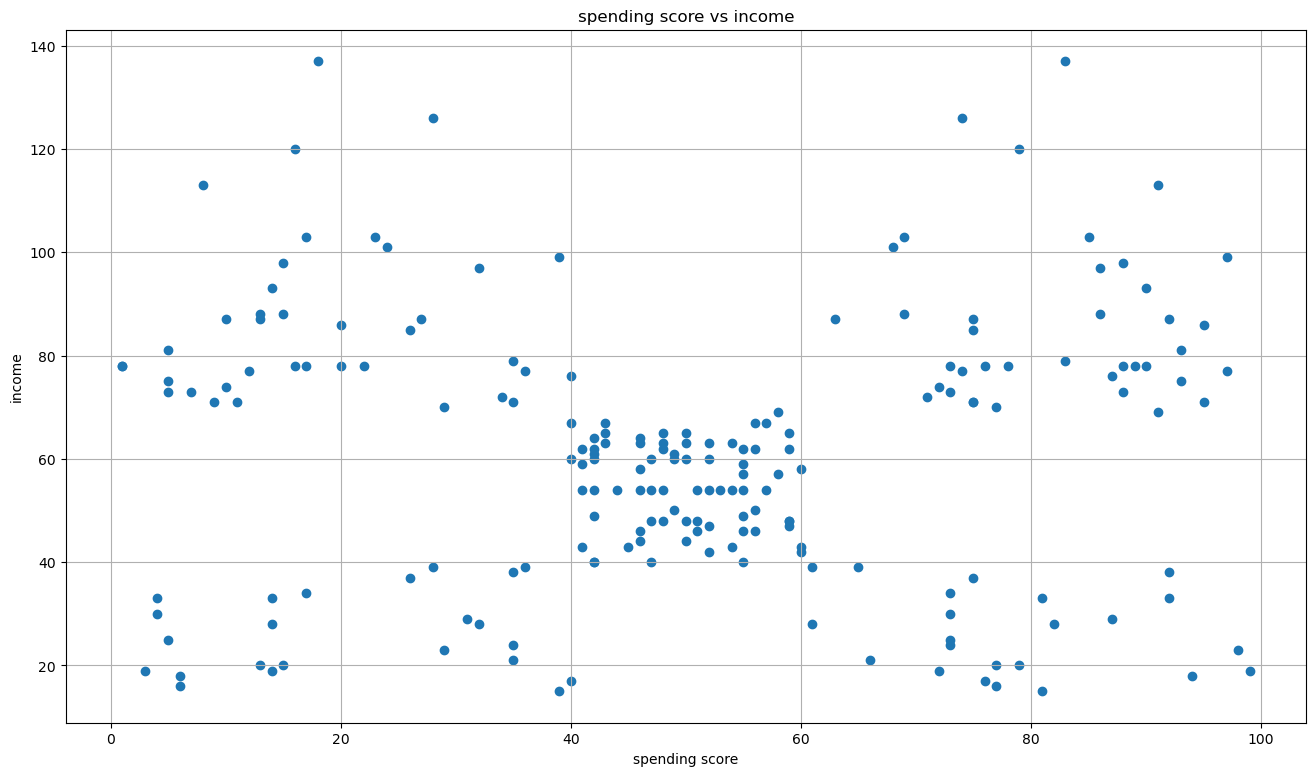

In [16]:
plt.figure(figsize=(16, 9))

plt.title('spending score vs income')
plt.xlabel('spending score')
plt.ylabel('income')
plt.scatter(x.iloc[:, 1], x.iloc[:, 0])
plt.grid();

In [18]:
from sklearn.cluster import KMeans

In [20]:
km = KMeans(n_clusters= 3)

In [22]:
labels = km.fit_predict(x)

In [24]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [26]:
km.inertia_

106348.37306211119

In [28]:
# find different values of inertia for different no of clusters
# plot the graph k-value vs inertia
# figure out optimal value of no of clusters

In [30]:
sse = []

for k in range(1, 16):
    km = KMeans(n_clusters= k, random_state= 0)
    labels = km.fit_predict(x)
    sse.append(km.inertia_)

In [34]:
sse;

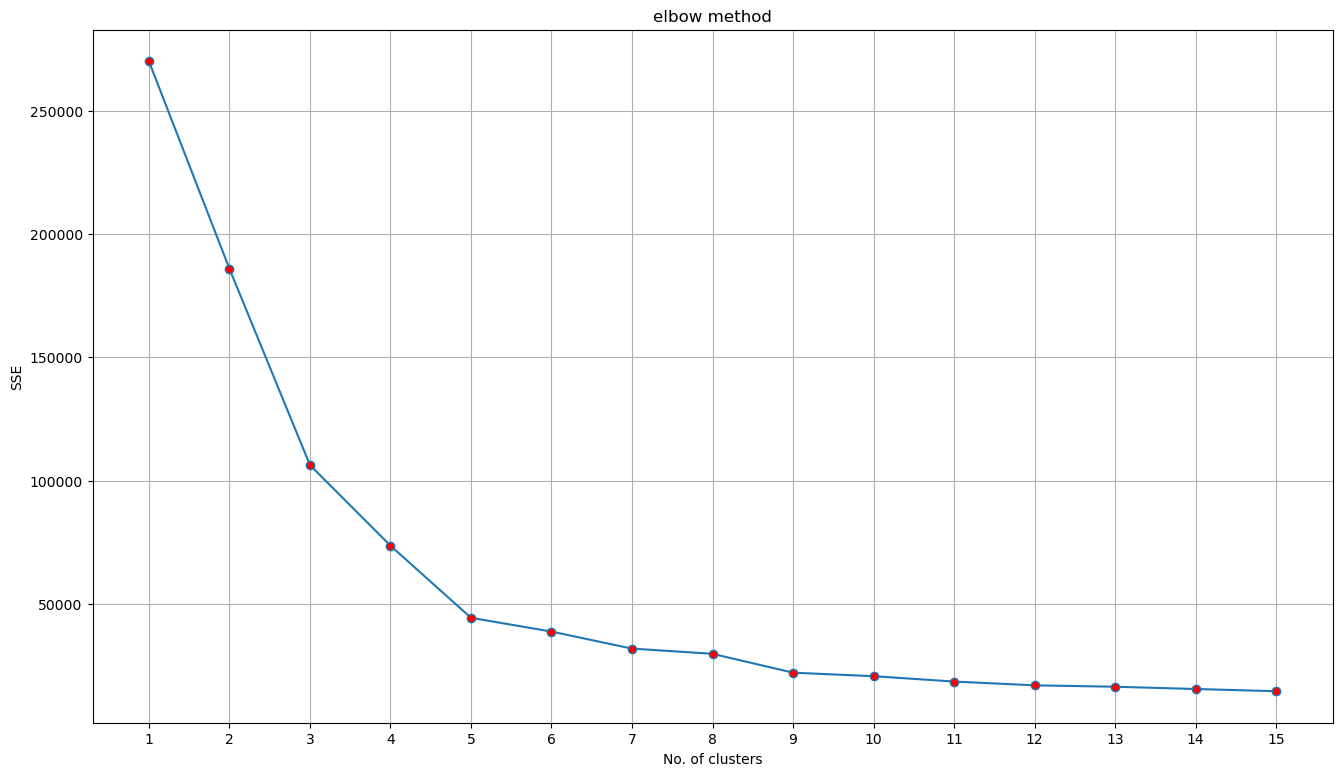

In [38]:
plt.figure(figsize=(16,9))
plt.title('elbow method')
plt.xlabel('No. of clusters')
plt.ylabel('SSE')
plt.xticks(range(1,17))
plt.plot(range(1,16), sse, marker = 'o', mfc = 'red');
plt.grid();

In [42]:
# !pip install kneed

In [44]:
from kneed import KneeLocator

In [46]:
kl = KneeLocator(range(1,16), sse, direction = 'decreasing',
                curve = 'convex')

In [48]:
kl.elbow

5

In [50]:
# build with 5 clusters

In [52]:
km = KMeans(n_clusters= 5, random_state= 0)

In [54]:
labels = km.fit_predict(x)

In [56]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

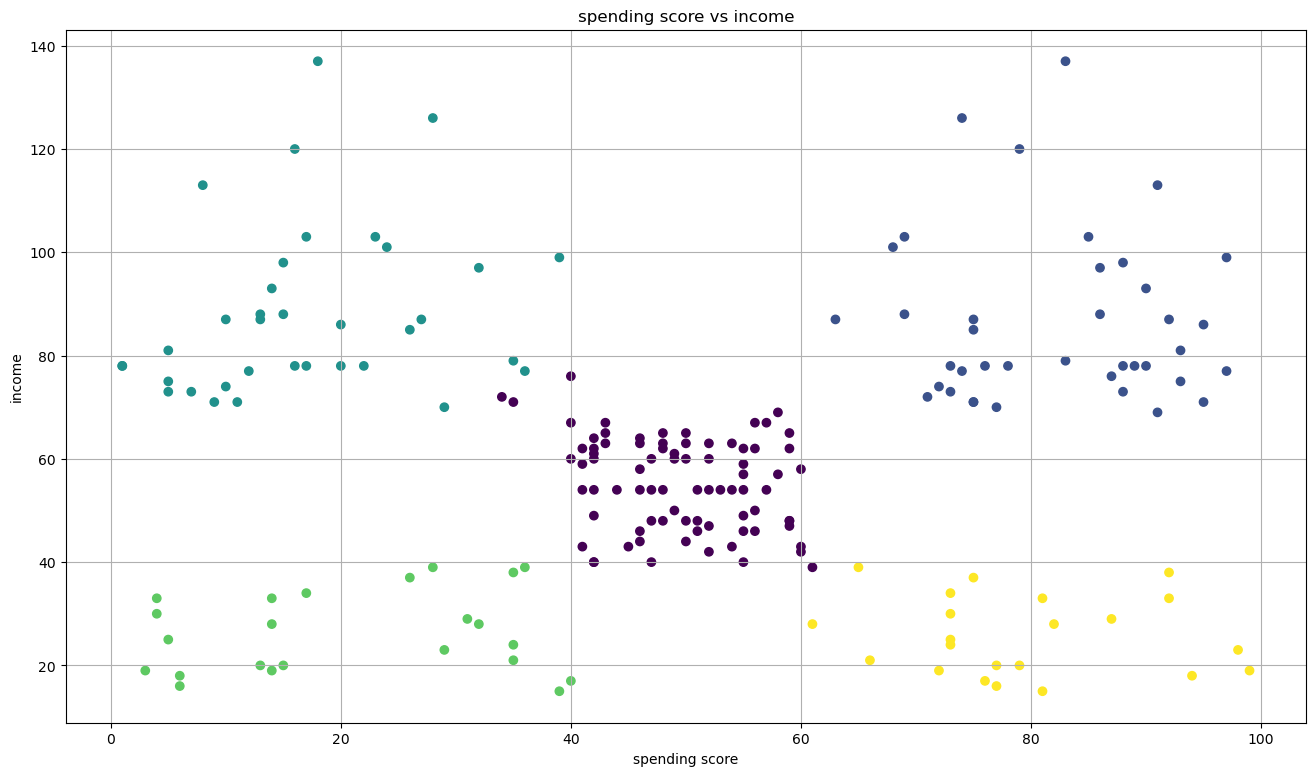

In [58]:
plt.figure(figsize=(16, 9))

plt.title('spending score vs income')
plt.xlabel('spending score')
plt.ylabel('income')
plt.scatter(x.iloc[:, 1], x.iloc[:, 0], c = labels)
plt.grid();

In [60]:
high_spenders = df[labels == 0]

In [62]:
high_spenders

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
43,44,Female,31,39,61
46,47,Female,50,40,55
47,48,Female,27,40,47
48,49,Female,29,40,42
49,50,Female,31,40,42
...,...,...,...,...,...
121,122,Female,38,67,40
122,123,Female,40,69,58
126,127,Male,43,71,35
132,133,Female,25,72,34
